# ANOVA для беты  

Используются данные из table_for_anova.csv   

Для этого использовался скрипт: 

/home/vtretyakova/Рабочий стол/ANOVA_for_extrem/table_for_ANOVA.py


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multitest import fdrcorrection
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from scipy.stats import ttest_rel

In [2]:
# load data file
d = pd.read_csv(r"/home/vera/MNE/ANOVA/table_for_anova.csv")
d.tail(10)

,Condition,Hand,Minimum_beta,Maximum_beta
133,self_pased,left,-2.264036,1.671180
134,self_pased,left,-10.009629,1.220419
135,self_pased,left,-2.395103,2.580837
136,self_pased,left,-4.061008,2.879128
137,self_pased,left,-3.125089,1.594101
138,self_pased,left,-6.561952,2.634952
139,self_pased,left,-5.808643,3.358962
140,self_pased,left,-7.064633,3.368875
141,self_pased,left,-11.551385,3.668236
142,self_pased,left,-1.985082,2.911335


# ANOVA для кондишена с тремя уровнями (Targeting, Probing, Self Paced)

###### Строим Boxplot для трех условий

In [14]:
my_pal = {Hand: "r" if Hand == "right" else "b" for Hand in d.Hand.unique()}

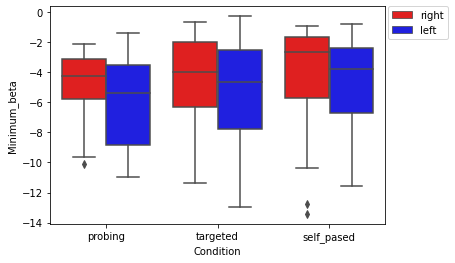

In [15]:
sns.boxplot(x="Condition", y="Minimum_beta", hue="Hand", data=d, palette=my_pal)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_three_cond_minimum.jpeg", format='jpeg',dpi=300)

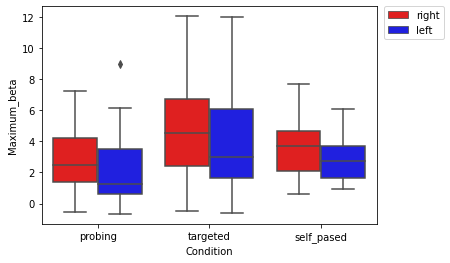

In [22]:
sns.boxplot(x="Condition", y="Maximum_beta", hue="Hand", data=d, palette=my_pal)
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_three_cond_maximum.jpeg", format='jpeg',dpi=300)

<AxesSubplot:xlabel='Condition', ylabel='Maximum beta'>

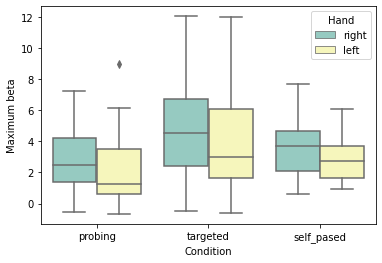

In [5]:
sns.boxplot(x="Condition", y="Maximum beta", hue="Hand", data=d, palette="Set3")

###### Строим модель и проводим дисперсионный анализ

In [8]:
model = ols('Minimum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)', data=d).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Condition),25.076700,2.0,1.306421,0.274139
C(Hand),19.167204,1.0,1.997107,0.159868
C(Condition):C(Hand),1.411014,2.0,0.073510,0.929164
Residual,1314.855075,137.0,NaN,NaN


In [14]:
model = ols('Maximum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)', data=d).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Condition),76.270172,2.0,6.480312,0.002046
C(Hand),19.892888,1.0,3.380407,0.068141
C(Condition):C(Hand),0.830911,2.0,0.070599,0.931870
Residual,806.212269,137.0,NaN,NaN


# ANOVA для кондишена с двумя уровнями (Targeting, Probing)

In [11]:
d2 = d[d['Condition'] != 'self_pased']
d2.tail(10)

,Condition,Hand,Minimum_beta,Maximum_beta
78,targeted,left,-5.160903,1.898086
79,targeted,left,-1.982809,5.565144
80,targeted,left,-10.380881,0.849678
81,targeted,left,-4.328391,6.024862
82,targeted,left,-7.810778,1.602543
83,targeted,left,-3.616617,2.831747
84,targeted,left,-7.287090,1.465117
85,targeted,left,-3.795074,9.475308
86,targeted,left,-2.757010,6.391339
87,targeted,left,-4.810514,5.693317


###### Boxplots для двух условий

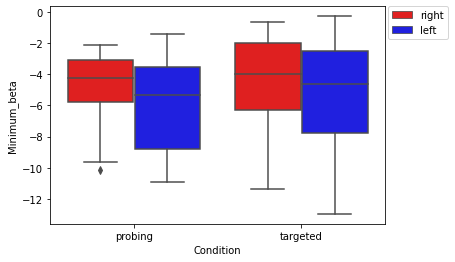

In [12]:
my_pal = {Hand: "r" if Hand == "right" else "b" for Hand in d2.Hand.unique()}
sns.boxplot(x="Condition", y="Minimum_beta", hue="Hand", data=d2, palette=my_pal)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_two_cond_minimum.jpeg", format='jpeg',dpi=300)

<AxesSubplot:xlabel='Condition', ylabel='Minimum_beta'>

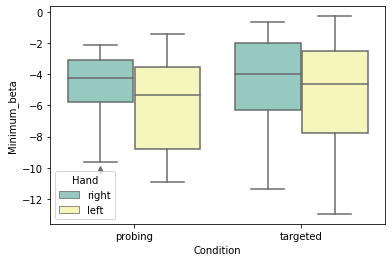

In [6]:
sns.boxplot(x="Condition", y="Minimum_beta", hue="Hand", data=d2, palette="Set3")

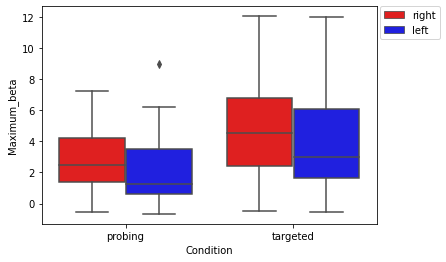

In [13]:
my_pal = {Hand: "r" if Hand == "right" else "b" for Hand in d.Hand.unique()} # задаем цвета
sns.boxplot(x="Condition", y="Maximum_beta", hue="Hand", data=d2, palette=my_pal)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_two_cond_maximum.jpeg", format='jpeg',dpi=300)

<AxesSubplot:xlabel='Condition', ylabel='Maximum_beta'>

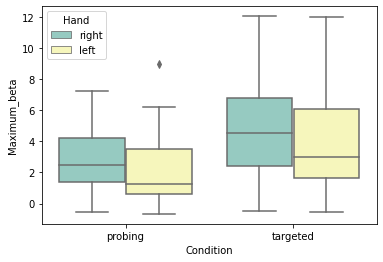

In [7]:
sns.boxplot(x="Condition", y="Maximum_beta", hue="Hand", data=d2, palette="Set3")

In [12]:
model = ols('Minimum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)', data=d2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Condition),7.312325,1.0,0.834360,0.363629
C(Hand),15.942451,1.0,1.819085,0.181047
C(Condition):C(Hand),0.600818,1.0,0.068555,0.794093
Residual,736.175409,84.0,NaN,NaN


In [13]:
model = ols('Maximum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)', data=d2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Condition),73.684950,1.0,9.234732,0.003165
C(Hand),8.951298,1.0,1.121841,0.292558
C(Condition):C(Hand),0.161985,1.0,0.020301,0.887041
Residual,670.245304,84.0,NaN,NaN


# Тест Тьюки

Теперь мы знаем, что различия беты между условиями статистически значимы, но ANOVA не показывает, при каких кондишенах значение беты значительно отличается друг от друга. Чтобы узнать пары значимо различающихся мощностей беты при отпределенных кондишенах, выполним анализ множественных парных сравнений (Post-hoc comparison), используя тест HSD Тьюки.

In [19]:
res = stat()
res.tukey_hsd(df=d, res_var='Maximum_beta', xfac_var='Condition', anova_model='Maximum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,probing,targeted,1.830114,0.604550,3.055678,5.004261,0.001587
1,probing,self_pased,0.631892,-0.530780,1.794564,1.821309,0.406027
2,targeted,self_pased,1.198222,0.035549,2.360894,3.453646,0.041763


In [20]:
res = stat()
res.tukey_hsd(df=d2, res_var='Maximum_beta', xfac_var='Condition', anova_model='Maximum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,probing,targeted,1.830114,0.632504,3.027724,4.297611,0.003167


# t test для связанных выборок

In [5]:
d2_probing = d2[d2['Condition'] == 'probing']
d2_targeted = d2[d2['Condition'] == 'targeted']

In [7]:
data1 = d2_probing['Maximum_beta']
data2 = d2_targeted['Maximum_beta']

stat, p = ttest_rel(data1, data2)
p = float(p)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-3.899, p=0.000
Different distributions (reject H0)


#####  Получили значимое отличие между максимумами беты для условий  targeting и probing - p-value = 0.05   
##### Сделаем поправку на множественные сравнения с помощью FDR коррекции

In [9]:
rejected, p_val_fdr = fdrcorrection(p, alpha=0.05, method='indep', is_sorted=False)

##### установили, что отличия все еще значимые, даже после коррекции

In [11]:
p_val_fdr

array([0.00033358])

In [16]:
data1 = d2_probing['Minimum_beta']
data2 = d2_targeted['Minimum_beta']

stat, p = ttest_rel(data1, data2)
p = float(p)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-1.298, p=0.201
Same distributions (fail to reject H0)
